## The Nobel Prize

The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [30]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Start coding here!

In [2]:
df=pd.read_csv('data/nobel.csv')
df.tail(2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
998,2023,Peace,The Nobel Peace Prize 2023,"""for her fight against the oppression of women...",1/1,1033,Individual,Narges Mohammadi,1972-04-21,Zanjan,Iran,Female,NaN,NaN,NaN,NaN,NaN,NaN
999,2023,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having advanced our understanding of wome...",1/1,1034,Individual,Claudia Goldin,1946-00-00,"New York, NY",United States of America,Female,Harvard University,"Cambridge, MA",United States of America,NaN,NaN,NaN


In [26]:
sex_count = df['sex'].value_counts()
sex_count

Male      905
Female     65
Name: sex, dtype: int64

In [27]:
type(sex_count)

pandas.core.series.Series

In [36]:
labels=['Male','Female']
size=sex_count
colors=['cyan','orange']
explode=[0.1,0.1]

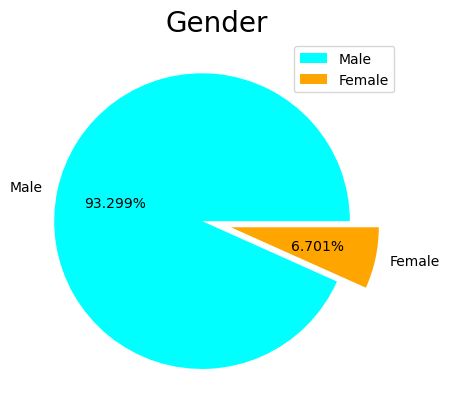

In [38]:
plt.pie(size, labels=labels, colors = colors, explode=explode, shadow=False, autopct='%.3f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')
plt.legend(loc='upper right')
plt.show()

#### Most of the winners are  Male

In [23]:
df['birth_country'].value_counts()

United States of America                        291
United Kingdom                                   91
Germany                                          67
France                                           58
Sweden                                           30
                                               ... 
Austria-Hungary (Ukraine)                         1
Ottoman Empire (Turkey)                           1
Russian Empire (Azerbaijan)                       1
Bosnia (Bosnia and Herzegovina)                   1
French protectorate of Tunisia (now Tunisia)      1
Name: birth_country, Length: 129, dtype: int64

In [60]:
a=df['birth_country'].value_counts()
a=a[a>10]
label = a.index

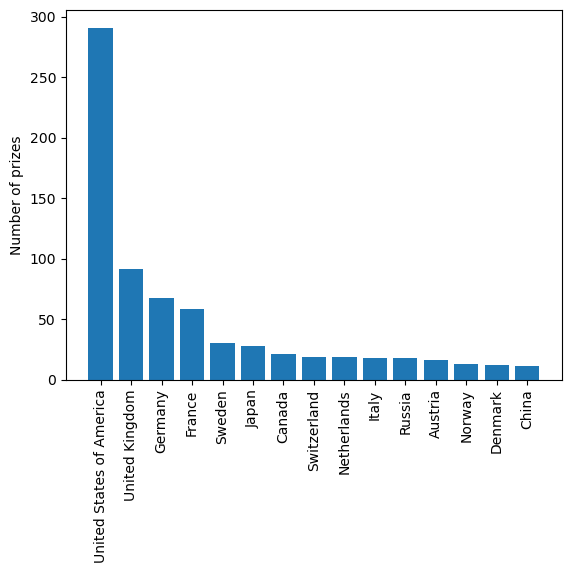

In [75]:
fig, ax = plt.subplots()
ax.bar(label, a)

ax.xaxis.set_ticks(label)
ax.set_xticklabels(label, rotation=90)
ax.set_ylabel('Number of prizes')
plt.show()

In [51]:
a

United States of America    291
United Kingdom               91
Germany                      67
France                       58
Sweden                       30
Japan                        28
Canada                       21
Switzerland                  19
Netherlands                  19
Italy                        18
Russia                       18
Austria                      16
Norway                       13
Denmark                      12
China                        11
Name: birth_country, dtype: int64

#### The country with most winners is  United States of America

In [5]:
df_us_w = df[df['birth_country']=='United States of America']
df_us_w.head(2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
35,1906,Peace,The Nobel Peace Prize 1906,NaN,1/1,470,Individual,Theodore Roosevelt,1858-10-27,"New York, NY",United States of America,Male,NaN,NaN,NaN,1919-01-06,"Oyster Bay, NY",United States of America
72,1912,Peace,The Nobel Peace Prize 1912,NaN,1/1,480,Individual,Elihu Root,1845-02-15,"Clinton, NY",United States of America,Male,NaN,NaN,NaN,1937-02-07,"New York, NY",United States of America


In [6]:
no_complete_deca = int(len(df['year'].unique())/10)

In [7]:

for i in range(1,no_complete_deca +1 +1):
    x=10*i
    p_decada = 1890+x
    f_decada = 1899+x
    no = df_us_w[(df_us_w['year']>=p_decada)&(df_us_w['year']<=f_decada)].value_counts('year').sum()
    print(p_decada, ' - ', f_decada, ' el total = ', no)

1900  -  1909  el total =  1
1910  -  1919  el total =  3
1920  -  1929  el total =  4
1930  -  1939  el total =  14
1940  -  1949  el total =  13
1950  -  1959  el total =  21
1960  -  1969  el total =  21
1970  -  1979  el total =  33
1980  -  1989  el total =  31
1990  -  1999  el total =  42
2000  -  2009  el total =  52
2010  -  2019  el total =  38
2020  -  2029  el total =  18


#### The decade with more USA prizes was 2000

In [8]:
df_year = df['year']
decade = []
for i in range(1,no_complete_deca +1 +1):
    x=10*i
    p_decada = 1890+x
    f_decada = 1899+x
    for i in df_year:
        if (i >=p_decada) & (i <=f_decada):
            decade.append(p_decada)

In [9]:
df['decade'] = decade

In [10]:
df_female = df[df['sex']=='Female'][['decade','category','year']]
df_female

,decade,category,year
19,1900,Physics,1903
29,1900,Peace,1905
51,1900,Literature,1909
62,1910,Chemistry,1911
128,1920,Literature,1926
...,...,...,...
982,2020,Literature,2022
989,2020,Medicine,2023
993,2020,Physics,2023
998,2020,Peace,2023


In [11]:
unique_decade = list(set(decade))
unique_decade.sort()
unique_decade

[1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

In [12]:
for i in unique_decade:
    print('decade: ',i,df_female[(df_female['year']>=i)&(df_female['year']<=i+9)].value_counts('category'))

decade:  1900 category
Literature    1
Peace         1
Physics       1
dtype: int64
decade:  1910 category
Chemistry    1
dtype: int64
decade:  1920 category
Literature    2
dtype: int64
decade:  1930 category
Chemistry     1
Literature    1
Peace         1
dtype: int64
decade:  1940 category
Literature    1
Medicine      1
Peace         1
dtype: int64
decade:  1950 Series([], dtype: int64)
decade:  1960 category
Chemistry     1
Literature    1
Physics       1
dtype: int64
decade:  1970 category
Peace       3
Medicine    1
dtype: int64
decade:  1980 category
Medicine    3
Peace       1
dtype: int64
decade:  1990 category
Literature    3
Peace         3
Medicine      1
dtype: int64
decade:  2000 category
Medicine      4
Literature    3
Peace         2
Chemistry     1
Economics     1
dtype: int64
decade:  2010 category
Peace         5
Literature    3
Medicine      2
Chemistry     1
Economics     1
Physics       1
dtype: int64
decade:  2020 category
Chemistry     3
Literature    2
Peace  

#### The year with more prizes to women was 2010 with 5 in Peace

In [13]:
df[(df['decade']==1900)&(df['sex']=='Female')]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,1900
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,468,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Female,NaN,NaN,NaN,1914-06-21,Vienna,Austria,1900
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,579,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Female,NaN,NaN,NaN,1940-03-16,Mårbacka,Sweden,1900


In [14]:
first_woman_name = 'Marie Curie, née Sklodowska'

In [15]:
first_woman_category = 'Physics'

###  People who have won multiple Nobel Prizes.

In [16]:
prices_per_indiv= df['full_name'].value_counts()


In [17]:
lista_ppi = prices_per_indiv[prices_per_indiv > 1].index

In [18]:
len(lista_ppi)

6

In [19]:
lista_ppi = list(lista_ppi)

In [20]:
repeat_list = []
for i in lista_ppi:
    repeat_list.append(i)

In [21]:
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']

### Results

The gender with the most Nobel laureates is : Male
 The most common birth country of Nobel laureates is : United States of America

 The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.

 The repeat winners are : ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']